# WeatherPy 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

In [4]:
#pulling cities into a dataframe
City_df = ({
    "City": cities})
City_weather_df = pd.DataFrame(City_df)
City_weather_df.head()

,City
0,shimoda
1,ancud
2,avarua
3,mataura
4,codrington


In [5]:
#creating space in dataframe to add additional information about the cities
City_weather_df["Cloudiness"]=" "
City_weather_df ["Country"]='' 
City_weather_df ["Date"]=''     
City_weather_df ["Humidity"]=''  
City_weather_df ["Lat"]=''       
City_weather_df ["Lng"]=''   
City_weather_df ["Max_Temp"]='' 
City_weather_df ["Wind_speed"]=''
City_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_speed
0,shimoda,,,,,,,,
1,ancud,,,,,,,,
2,avarua,,,,,,,,
3,mataura,,,,,,,,
4,codrington,,,,,,,,


In [6]:
# A weather check on each city using a series of successive API calls.
#Calling API and adding data into the city_weather_df dataframe
#printing log of each city as it is being processed (with the city number and city name).
url = "http://api.openweathermap.org/data/2.5/weather?"

units = 'imperial'

for index, row in City_weather_df.iterrows():
    city = row['City']
    query_url =f"{url}appid={api_key}&q={city}&units={units}"
    print('Beginning Data Retrieval')
    print(f"processing City Record no.{index}: {city}")
    print("------------------------")
    json_data = requests.get(query_url).json()
    try:
        City_weather_df.loc[index,'Cloudiness'] = json_data ['clouds']['all']
        City_weather_df.loc[index,'Country'] = json_data['sys']['country']
        City_weather_df.loc[index,'Date'] = json_data['dt']
        City_weather_df.loc[index,'Humidity'] = json_data['main']['humidity']
        City_weather_df.loc[index,'Lat'] = json_data['coord']['lat']
        City_weather_df.loc[index,'Lng'] = json_data['coord']['lon']
        City_weather_df.loc[index,'Max_Temp'] = json_data['main']['temp_max']
        City_weather_df.loc[index,'Wind_speed'] = json_data['wind']['speed']
        
        
    except (KeyError, IndexError):
        print("Missing field.....skipping")
    print("-------------------------")
 

Beginning Data Retrieval
processing City Record no.0: shimoda
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.1: ancud
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.2: avarua
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.3: mataura
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.4: codrington
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.5: new norfolk
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.6: nouadhibou
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.7: dikson
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.8: kyshtovka
------------------------
-

-------------------------
Beginning Data Retrieval
processing City Record no.71: pullman
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.72: klaksvik
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.73: tiksi
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.74: mocajuba
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.75: mantua
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.76: ambilobe
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.77: zhoucheng
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.78: krasnoselkup
------------------------
Missing field.....skipping
-------------------------
Beginning Data Retrieval
pro

-------------------------
Beginning Data Retrieval
processing City Record no.141: san patricio
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.142: longhua
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.143: sola
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.144: san cristobal
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.145: mitsamiouli
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.146: nikolskoye
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.147: kavieng
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.148: luderitz
------------------------
-------------------------
Beginning Data Retrieval
processing Ci

-------------------------
Beginning Data Retrieval
processing City Record no.210: chirongui
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.211: moose factory
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.212: eyl
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.213: pankrushikha
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.214: halalo
------------------------
Missing field.....skipping
-------------------------
Beginning Data Retrieval
processing City Record no.215: medea
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.216: salalah
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.217: east london
------------------------
-------------------------
Beginning Data Re

-------------------------
Beginning Data Retrieval
processing City Record no.279: oga
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.280: vardo
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.281: juba
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.282: goderich
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.283: alenquer
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.284: orsha
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.285: anloga
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.286: longyearbyen
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.287: zhi

-------------------------
Beginning Data Retrieval
processing City Record no.349: imbituba
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.350: rio bueno
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.351: domoni
------------------------
Missing field.....skipping
-------------------------
Beginning Data Retrieval
processing City Record no.352: ratnagiri
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.353: leoben
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.354: samusu
------------------------
Missing field.....skipping
-------------------------
Beginning Data Retrieval
processing City Record no.355: we
------------------------
Missing field.....skipping
-------------------------
Beginning Data Retrieval
processing City Record no.356: bria
------------------------
-----

-------------------------
Beginning Data Retrieval
processing City Record no.417: oktyabrskoye
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.418: bandar
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.419: mabaruma
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.420: yanliang
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.421: suchiapa
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.422: mango
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.423: scarborough
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.424: port moresby
------------------------
-------------------------
Beginning Data Retrieval
processing City

-------------------------
Beginning Data Retrieval
processing City Record no.487: acajutla
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.488: kholmogory
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.489: ngunguru
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.490: arlit
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.491: upernavik
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.492: vaitape
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.493: port hedland
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.494: maloy
------------------------
-------------------------
Beginning Data Retrieval
processing City Recor

-------------------------
Beginning Data Retrieval
processing City Record no.557: galiakot
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.558: flin flon
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.559: tapaua
------------------------
Missing field.....skipping
-------------------------
Beginning Data Retrieval
processing City Record no.560: alice springs
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.561: sao goncalo
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.562: namtsy
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.563: wasilla
------------------------
-------------------------
Beginning Data Retrieval
processing City Record no.564: kasongo-lunda
------------------------
-------------------------
Beginning 

In [18]:
#Convert Raw Data to DataFrame
City_weather_df.to_csv('City_weather.csv', encoding = 'utf-8', index=False)
#Display the Dataframe
City_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_speed
0,shimoda,75,JP,1571024973,93,34.70,138.93,71.60,26.4
1,ancud,0,CL,1571024973,65,-41.87,-73.83,44.60,10.29
2,avarua,0,CK,1571024973,64,-21.21,-159.78,73.40,9.17
3,mataura,100,NZ,1571024974,67,-46.19,168.86,60.76,5.09
4,codrington,75,AU,1571024974,44,-28.95,153.24,80.60,8.05


In [8]:
#Converting object data to numeric type 
City_weather_df["Lat"] =pd.to_numeric(City_weather_df["Lat"])
City_weather_df["Max_Temp"] = pd.to_numeric(City_weather_df["Max_Temp"])

In [9]:
City_weather_df.dtypes

City           object
Cloudiness     object
Country        object
Date           object
Humidity       object
Lat           float64
Lng            object
Max_Temp      float64
Wind_speed     object
dtype: object

# Plotting the Data

#### Latitude vs. Temperature Plot

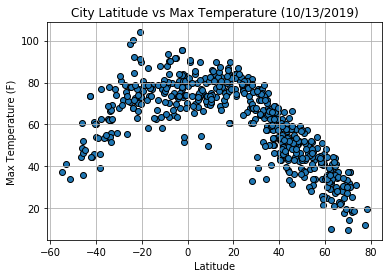

In [12]:
plt.scatter((City_weather_df["Lat"]), (City_weather_df["Max_Temp"]), marker="o",edgecolor='k' )
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature (10/13/2019)")
plt.savefig("../Figures/Latitude_vs_MaxTemp")

#### Latitude vs. Humidity Plot

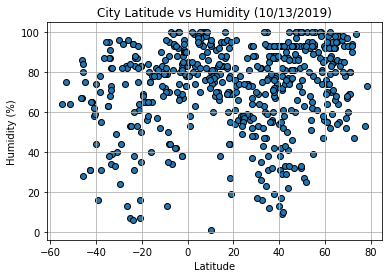

In [13]:
plt.scatter((City_weather_df["Lat"]), (City_weather_df["Humidity"]), marker="o",edgecolor='k' )
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (10/13/2019)")
plt.savefig("../Figures/Latitude_vs_Humidity")

#### Latitude vs. Cloudiness Plot

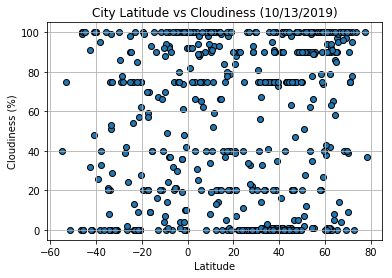

In [15]:
plt.scatter((City_weather_df["Lat"]), (City_weather_df["Cloudiness"]), marker="o",edgecolor='k' )
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (10/13/2019)")
plt.savefig("../Figures/Latitude_vs_Cloudiness")

#### Latitude vs. Wind Speed Plot

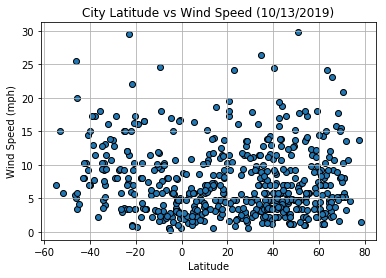

In [16]:
plt.scatter((City_weather_df["Lat"]), (City_weather_df["Wind_speed"]), marker="o",edgecolor='k' )
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (10/13/2019)")
plt.savefig("../Figures/Latitude_vs_windspeed")

Observations
1) As expected latitude significantly impacted maximum temperature. 
The figure (latitude vs maxtemp) shows that the cities near equator have higher maximum temperature 
compared to the cities further away from equator.
 
2) On average, cities near equator seems to have higher humidity campared to cities away from equator. 
However, the pattern is not as clear as it is for maximum temperature. Significance of the data
can be tested to verify the observation.

3) Latitude did not have impact on cloudiness % or wind_speed around the time the data was collected.